# Quantum PageRank with Szegedy quantum walks

In this notebook we implement a quantum gate-based algorithm that replicates the behaviour of the Quantum PageRank algorithm presented in the paper of T.Loke and J.B Wang, Efficient quantum circuits for Szegedy quantum walks, [arXiv:1609.00173v1](https://arxiv.org/pdf/1609.00173.pdf)[quant-ph].

# Introduction

Quantum walks, the quantum mechanical counterpart of random walks, were originally designed to model quantum phenomena as well as a mathematical tool for building quantum algorithms that has been shown to constitute an universal model of quantum computation. Two popular models of discrete-time quantum walk are coined quantum walks and Szegedy's quantum walks. In both models, time runs in discrete steps, $t \in \mathbb{N}$.

The quantum PageRank uses the Szegedy formalism [[1]](https://ieeexplore.ieee.org/abstract/document/1366222) to quantize the classical Google PageRank algorithm [[2]](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf). Quantum walks take place on graphs, which are mathematical structures defined by edges and vertices. In a classical random walk, we consider the vertices as the sites upon which the walker can move and the edges tell the possible directions the walker can move across vertices. In the context of quantum walks, vertices represent the states a quantum walker is allowed to take and edges represent quantum state transitions.

## Szegedy quantum walk

Szegedy's quantum walk takes place on a symmetric bipartite digraph. A symmetric bipartite digraph is obtained by a duplication process of the underlying digraph (Fig. below). The underlying digraph defines a classical Markov chain and the Szegedy's model is considered as the quantized version of this Markov chain.
To describe the duplication process, consider a bipartite graph with identical sets $X$ and $Y$ of equal cardinalities. Let $x$ and $y$ be vertices of $X$ and $Y$, respectively. The edges $\{x_{i}, x_{j}\}$ of the underlying graph, connects the adjacent vertices $x_{i}$ and $x_{j}$, corresponds to two edges $\{ x_{i}, y_{j}\}$ and $\{y_{i},x_{j} \}$ in the bipartite graph.


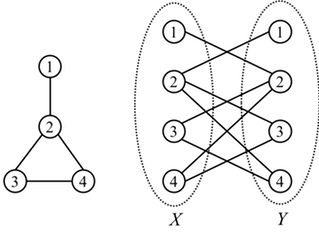

The biadjacency matrix of the bipartite graph $\Gamma$ is
\begin{equation*}
    \begin{pmatrix}
 0 & A\\ 
 A^{T}& 0
\end{pmatrix}
\end{equation*}

where $A$ allow us to define transition matrix $P$ as a probabilistic mapping from $X$ to $Y$ with entries $p_{xy}$. Matrix $A^{T}$, similarly, defines $Q$ as  a probabilistic mapping from $Y$ to $X$ with entries $q_{yx}$.

The quantum walk on the bipartite graph has an associated Hilbert space $\mathcal{H}^{mn}= \mathcal{H}^{m} \otimes \mathcal{H}^{n}$ where $m=|X|$ and $n=|Y|$. The computational basis of which is $\{ |x,y>: x\in X, y\in Y \}$. Instead of using probability matrices $P$ and $Q$ of the classical random walk, which entries are $p_{xy}$ and $q_{yx}$, we define operators $A : \mathcal{H}^{n} \rightarrow \mathcal{H}^{n^2}$ and $B: \mathcal{H}^{n} \rightarrow \mathcal{H}^{n^2}$, known as half projectors, as follows

\begin{align}
\label{probabilityentryp}
    A &= \sum_{x\in X} |\phi_{x}><x|,\\
\label{probabilityentryq}
    B &= \sum_{y \in Y} |\psi_{y}><y|,
\end{align}
The quantization method $(P,Q)$ proposed by Szegedy starts by creating two operators on the Hilbert space with basis states $|x>$, $|y>$, where $x \in X$ and $y \in Y$, are defined as transition vectors as follows
 \begin{align}
 \label{eq:projectorstates}
    |\phi_{x}> &= \sum_{y\in Y} \sqrt{p_{xy}} |x> |y>\\
    |\psi_{y}> &= \sum_{x\in X} \sqrt{q_{yx}}|x> |y>
 \end{align}
These transition vectors are defined on a vector space $H_{A}\otimes H_{B}$ with basis states $\{|x>\}$ and $\{|y>\}$ correspond to $H_{A}$ and $H_{B}$ respectively.

The unitary bi-reflection operator (Szegedy's operator) is now given by
$$
W=(2AA^{\dagger}-1)(2BB^{\dagger}-1) = R_{A}R_{B}
$$

The Szegedy quantum walk is considered as a generalization of the Grover algorithm [[3]](https://pdfs.semanticscholar.org/83ff/1f40c5a7c4ffda96809e71c33cd0762db7b5.pdf). The interpretation of the Grover algorithm is that of a quantum walk on the edges of a complete graph [[1]](https://ieeexplore.ieee.org/abstract/document/1366222).

## Quantum walk on 4 nodes

Let us consider the dynamics of a quantum walk on a 4-node cycle. The quantum walk consists of a walk around a 4-node graph. It starts at vertex $00$. In the first step, the walker moves to vertex $01$ and $10$ with equal probability. Then it moves to state 11.
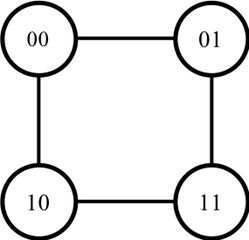

In [2]:
#definitions of registers and ancilla qubits
q0 = QuantumRegister(2, 'q0')
q1 = QuantumRegister(1, 'q1')
c0 = ClassicalRegister(2, 'c0')

qwc = QuantumCircuit(q0, q1, c0)

In [3]:
#coin operator
qwc.h(q1[0])

def runQWC(qwc, times):
    for i in range(times):
        qwc.cx(q1[0], q0[0])
        qwc.x(q1[0])
        qwc.cx(q1[0], q0[1])
        #qwc.barrier()
    return qwc

import matplotlib as mpl

step = 4

qwc = runQWC(qwc, step)
qwc.barrier()

qwc.measure(q0, c0)

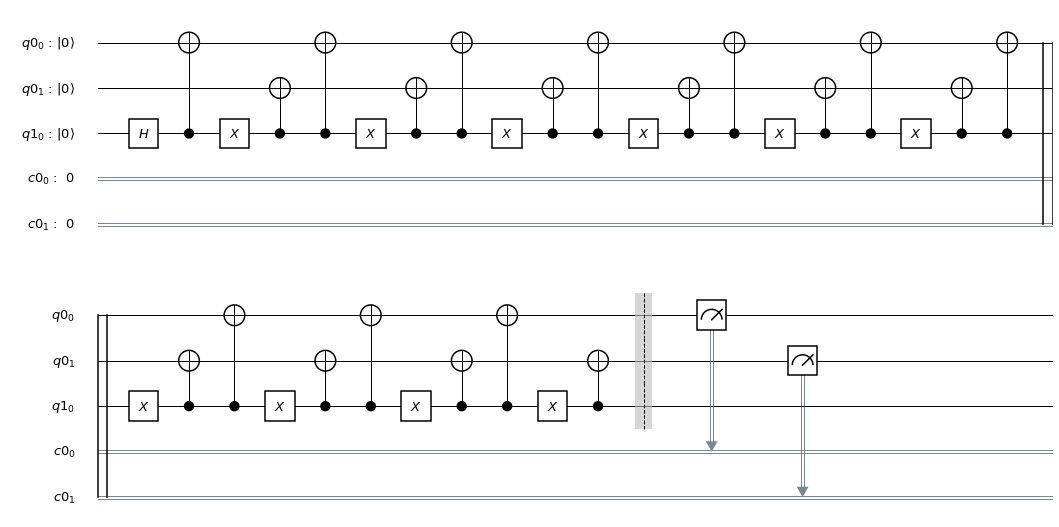

In [4]:
# Matplotlib Drawing
qwc.draw(output='mpl')

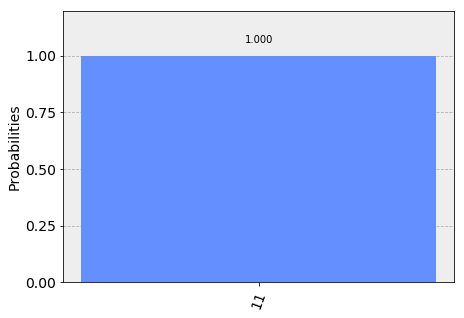

In [5]:
#Plotting
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('qasm_simulator')
job = execute(qwc, backend)

result = job.result()

outputstate = result.get_counts(qwc)

plot_histogram(outputstate)

# Quantum circuit for the Quantum PageRank.

We know that the Szegedy's model considers a connected bipartite graph $\Gamma (X,Y,E)$, where $X, Y$ are disjoint sets of vertices and $E$ is the set of non-directed edges. In the circuit model, we represent both sets of $n$ qubits as $|X>$ and $|Y>$. The controlled operations represent the mapping from the set $X$ to the set $Y$ and the swap operator the opposite direction, from $Y$ to $X$. Eight qubits are being set up and numbered as $q0, q1, anc$, consisting of 3, 3 and 2 qubits respectively. $q0$ and $q1$ represent each set and $anc$ represent the auxiliary qubits needed to manipulate higher order controlled gates.

Here, we reproduce the complete circuit proposed in [arXiv:1609.00173v1](https://arxiv.org/pdf/1609.00173.pdf)

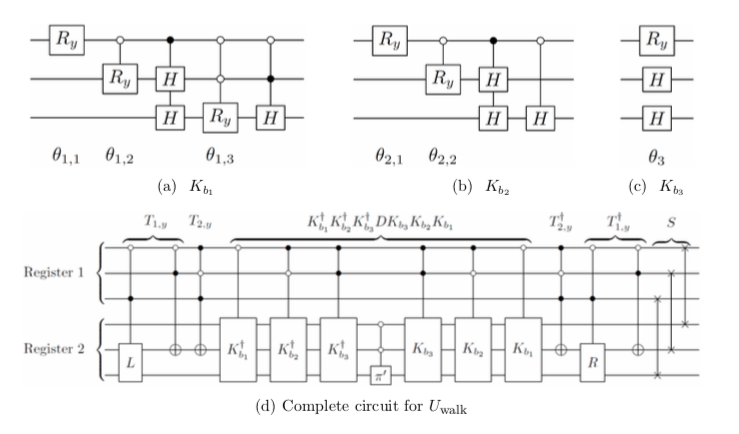

We start the walk in a superposition state in order to obtain $|0>$ and $|1>$ states that will control our gates.

In [2]:
import numpy as np
import Our_Qiskit_Functions as oq

from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, BasicAer, IBMQ, Aer
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram, plot_state

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

import Our_Qiskit_Functions as oq
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name= 'qasm_simulator')[0]

if( (QuantumRegister) and (Aer) and (S_simulator) and (oq) ):
    print(' Everything Imported Correctly ')

 Everything Imported Correctly 


In [3]:
#t1,y
def t1y(qc, q0, q1, anc):
    qc.x(q0[0])
    qc.ccx(q0[0], q0[2], anc[0])
    qc.cx(anc[0], q1[2])
    qc.ccx(anc[0], q1[2], anc[1])
    qc.cx(anc[1], q1[1])
    qc.ccx(anc[0], q1[2], anc[1])
    qc.ccx(q0[0], q0[2], anc[0])
    qc.ccx(q0[0], q0[1], q1[1])
    qc.x(q0[0])
    return t1y

#t2y
def t2y(qc, q0, q1, anc):
    qc.x(q0[1])
    qc.ccx(q0[0], q0[1], anc[0])
    qc.ccx(q0[2], anc[0], anc[1])
    qc.cx(anc[1], q1[1])
    qc.ccx(q0[2], anc[0], anc[1])
    qc.ccx(q0[0], q0[1], anc[0])
    qc.x(q0[1])
    return t2y


#kb1 dagger
alpha = 0.85
beta = (1 - alpha)/8
gamma1 = alpha + beta
gamma2 = alpha/2 + beta
gamma3 = alpha/4 + beta

angle11 = np.arccos(np.sqrt((3*beta+gamma1)/(7*beta+gamma1)))
angle12 = np.arccos(np.sqrt((beta+gamma1)/(3*beta+gamma1)))
angle13 = np.arccos(np.sqrt(beta/(beta + gamma1)))
angle21 = np.arccos(np.sqrt((beta+gamma2)/(3*beta+gamma2)))
angle22 = np.arccos(np.sqrt(gamma2/(beta+gamma2)))
angle3 = np.arccos(np.sqrt(beta/(beta+gamma3)))

def kb1dag(qc, q0, q1, anc):
    qc.x(q0[0])
    qc.x(q1[0])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.ccx(anc[0], q1[1], anc[1])
    qc.ch(anc[1], q1[2])
    qc.ccx(anc[0], q1[1], anc[1])
    qc.x(q1[1])    
    qc.ccx(anc[0], q1[1], anc[1])
    qc.cu3(-angle13, 0, 0, anc[1], q1[2])
    qc.ccx(anc[0], q1[1], anc[1])
    qc.x(q1[1])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.x(q1[0])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.ch(anc[0], q1[2])
    qc.ch(anc[0], q1[1])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.x(q1[0])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.cu3(-angle12, 0, 0, anc[0], q1[1])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.x(q1[0])
    qc.cu3(-angle11, 0, 0, q0[0], q1[0])
    qc.x(q0[0]) 
    return kb1dag

print('angle 11:',angle11)
print('angle 12:', angle12)
print('angle 13:', angle13)

#K_b2 dagger
def kb2dag(qc, q0, q1, anc):
    qc.x(q0[1])
    qc.ccx(q0[0], q0[1], anc[0])
    qc.x(q1[0])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.ch(anc[1], q1[2])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.x(q1[0])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.ch(anc[1], q1[2])
    qc.ch(anc[1], q1[1])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.x(q1[0])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.cu3(-angle22,0,0, anc[1], q1[1])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.x(q1[0])
    qc.cu3(-angle21, 0,0, anc[0], q1[0])
    qc.ccx(q0[0], q0[1], anc[0])    
    qc.x(q0[1])
    return kb2dag

print('angle 21:', angle21)
print('angle 22:', angle22)

#k_b3 dagger
def kb3dag(qc, q0, q1, anc):
    qc.ccx(q0[0], q0[1], anc[0])
    qc.ch(anc[0], q1[2])
    qc.ch(anc[0], q1[1])
    qc.cu3(-angle3, 0 ,0, anc[0], q1[0])
    qc.ccx(q0[0], q0[1], anc[0])
    return kb3dag
print('angle 3:',angle3)

#Controlled Paulli z
def pauliz(qc, q0, q1, anc):
    qc.x(q1[0])
    qc.x(q1[1])
    qc.ccx(q1[0], q1[1], q1[2])
    qc.z(q1[2])
    #qc.ccx(q1[0], q1[1], q1[2])
    qc.x(q1[1])
    qc.x(q1[0])
    
    #qc.x(q1[0])
    #qc.x(q1[1])
    #qc.ccx(q1[1], q1[0], anc[1])
    #qc.cz(anc[1], q1[2])
    #qc.ccx(q1[1], q1[0], anc[1])
    #qc.x(q1[0])
    #qc.x(q1[1])
    return pauliz

def kb3(qc, q0, q1, anc):
    qc.ccx(q0[0], q0[1], anc[0])
    qc.cu3(angle3, 0 ,0, anc[0], q1[0])
    qc.ch(anc[0], q1[1])
    qc.ch(anc[0], q1[2])
    qc.ccx(q0[0], q0[1], anc[0])
    return kb3

def kb2(qc, q0, q1, anc):
    qc.x(q0[1])
    qc.ccx(q0[0], q0[1], anc[0])
    qc.cu3(angle21, 0,0, anc[0], q1[0])
    qc.x(q1[0])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.cu3(angle22,0,0, anc[1], q1[1])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.x(q1[0])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.ch(anc[1], q1[1])
    qc.ch(anc[1], q1[2])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.x(q1[0])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.ch(anc[1], q1[2])
    qc.ccx(anc[0], q1[0], anc[1])
    qc.x(q1[0])
    qc.ccx(q0[0], q0[1], anc[0])
    qc.x(q0[1])
    return kb2

def kb1(qc, q0, q1, anc):
    qc.x(q0[0]) 
    qc.cu3(angle11, 0, 0, q0[0], q1[0])
    qc.x(q1[0])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.cu3(angle12, 0, 0, anc[0], q1[1])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.x(q1[0])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.ch(anc[0], q1[1])
    qc.ch(anc[0], q1[2])
    qc.ccx(q0[0], q1[0], anc[0])
    #Ry
    qc.x(q1[0])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.x(q1[1])
    qc.ccx(anc[0], q1[1], anc[1])
    qc.cu3(angle13, 0, 0, anc[1], q1[2])
    qc.ccx(anc[0], q1[1], anc[1])
    qc.x(q1[1])
    #qc.ccx(q0[0], q1[0], anc[0])
    #H
    #qc.ccx(q0[0], q1[0], anc[0])
    qc.ccx(anc[0], q1[1], anc[1])
    qc.ch(anc[1], q1[2])
    qc.ccx(anc[0], q1[1], anc[1])
    qc.ccx(q0[0], q1[0], anc[0])
    qc.x(q1[0])
    qc.x(q0[0])
    return kb1

def t2ydag(qc, q0, q1, anc):
    qc.x(q0[1])
    qc.ccx(q0[0], q0[1], anc[0])
    qc.ccx(q0[2], anc[0], anc[1])
    qc.cx(anc[1], q1[1])
    qc.ccx(q0[2], anc[0], anc[1])
    qc.ccx(q0[0], q0[1], anc[0])
    qc.x(q0[1])
    return t2ydag

def t1ydag(qc, q0, q1, anc):
    qc.x(q0[0])
    qc.ccx(q0[0], q0[1], q1[1])
    qc.ccx(q0[0], q0[2], anc[0])
    qc.ccx(anc[0], q1[2], anc[1])
    qc.cx(anc[1], q1[1])
    qc.ccx(anc[0], q1[2], anc[1])
    qc.cx(anc[0], q1[2])
    qc.ccx(q0[0], q0[2], anc[0])
    qc.x(q0[0])
    return t1ydag

def swap(qc, q0, q1):
    qc.swap(q0[2], q1[2])
    qc.swap(q0[1], q1[1])
    qc.swap(q0[0], q1[0])

angle 11: 0.2774055164900356
angle 12: 0.20273270302311774
angle 13: 1.42492912665274
angle 21: 0.277405516490036
angle 22: 0.20273270302311774
angle 3: 1.2933908103048608


In [4]:
q0 = QuantumRegister(3, 'q0')
q1 = QuantumRegister(3, 'q1')
anc = QuantumRegister(2, 'a')
c0 = ClassicalRegister(3, 'c0')
c1 = ClassicalRegister(3, 'c1')

qwc = QuantumCircuit(q0, anc, q1, c0, c1)

In [5]:
#superposition states
qwc.h(q0[0])
qwc.h(q0[1])
qwc.h(q0[2])

qwc.barrier()

def runQWC(qwc, times):
    for i in range(times):
        t1y(qwc, q0, q1, anc)
        t2y(qwc, q0, q1, anc)
        kb1dag(qwc, q0, q1, anc)
        kb2dag(qwc, q0, q1, anc)
        kb3dag(qwc, q0, q1, anc)
        pauliz(qwc, q0, q1, anc)
        kb3(qwc, q0, q1, anc)
        kb2(qwc, q0, q1, anc)
        kb1(qwc, q0, q1, anc)
        t2ydag(qwc, q0, q1, anc)
        t1ydag(qwc, q0, q1, anc)
        qwc.barrier()
        swap(qwc, q0, q1)
    return qwc

import matplotlib as mpl

step = 7

qwc = runQWC(qwc, step)

qwc.barrier()
qwc.measure(q1, c1)

In [6]:
qwc.draw(output='mpl', scale=0.9)

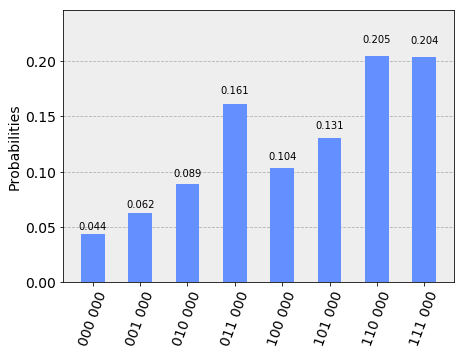

In [7]:
backend = Aer.get_backend('qasm_simulator')

outputstate = execute(qwc, backend).result().get_counts(qwc)

plot_histogram(outputstate, sort='asc')

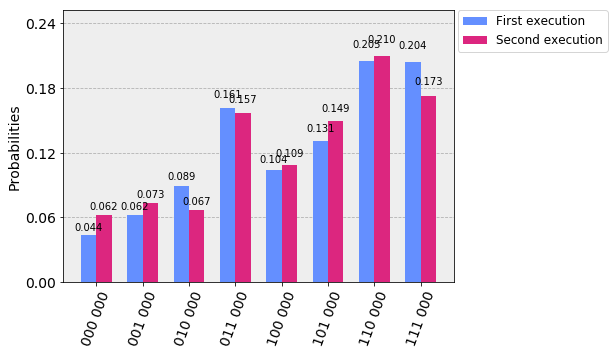

In [8]:
# Execute 2 qubit Bell state again
second_result = execute(qwc, backend, shots=1000).result()
second_counts  = second_result.get_counts(qwc)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([outputstate, second_counts], legend=legend)

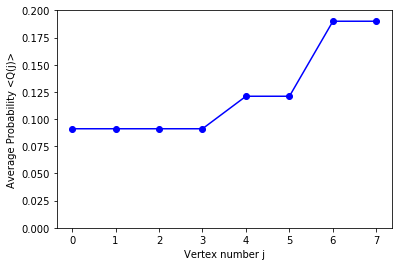

In [7]:
import numpy as np
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 

plt.ylabel('Average Probability <Q(j)>')
plt.xlabel('Vertex number j')
plt.ylim(0, 0.2)
plt.plot([0, 1, 2, 3, 4, 5, 6, 7], [0.0911, 0.0911, 0.0911, 0.0911, 0.121, 0.121, 0.19, 0.19], 'bo', linestyle='-')

plt.show()

We see that it converges at the desired results at step 7 and 14 of the walk. Since we grouped similar nodes in set $Z_{1}, Z_{2}$ and $Z_{3}$ we consider the nodes within each set to be equivalent. Hence, we are able to provide the average quantum PageRank for the Szegedy walk.

## References

[1] Szegedy, Mario. "Quantum speed-up of Markov chain based algorithms." 45th Annual IEEE symposium on foundations of computer science. IEEE, 2004.
[2] Page, Lawrence, et al. The PageRank citation ranking: Bringing order to the web. Stanford InfoLab, 1999.

[3] Whitfield, James D.. “Reflections in Hilbert Space II : Szegedy ’ s scheme for Markov chain quantization.” (2012).